distance =  0
mean_of_mean =  -0.00021555961454893094
Standard deviation =  1.079953519881838
distance =  1
mean_of_mean =  0.008646265758846975
Standard deviation =  1.1274869232297369
distance =  2
mean_of_mean =  0.004449872352576937
Standard deviation =  1.280279658743647
distance =  3
mean_of_mean =  0.0022473959448792574
Standard deviation =  1.4815405933217316
distance =  4
mean_of_mean =  0.004478288904785473
Standard deviation =  1.7461719635889625
distance =  5
mean_of_mean =  0.006803717115379638
Standard deviation =  2.013459625015978
[1.079737960267289, 1.136133188988584, 1.284729531096224, 1.4837879892666108, 1.750650252493748, 2.020263342131358]


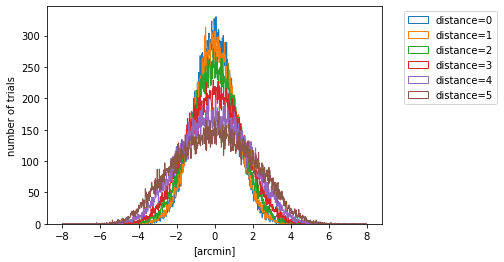

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
N=10

FWHM=8
dist_list=[]
sigma_list=[]
mean_sigma_list=[]
hist_list=[]

min = -8
max = 8
numbin = 1000

for d in range(0, 6):
    ni=[1.0,0.7,0.5,0.3,0.] #ここで0から1までの間で一様乱数を発生させリストを１つ作る
    dist_list.append(d)
    print("distance = ", d)
    mean_list=[]
    for i in range(10000):
        A = []
        for n in range(len(ni)):
            n1=int(N*ni[n])
            n2=N-n1
            a1=np.random.normal(
                loc   = -d/2,
                scale = FWHM/2.35,
                size  = n1,
                )
            #print("a1= ", a1)
            a2=np.random.normal(
                loc   = d/2,
                scale = FWHM/2.35,
                size  = n2,
                )
            #print("a2 ", a2)
            A=np.append(a1,a2)
            #print(A)
            mean=np.mean(A)
            mean_list.append(mean)
            #print("n1 = ", n1)
            #print("n2 = ", n2)
            #print("mean = ", mean)
            #plt.hist(a1)
            #plt.hist(A,bins=50,histtype="step",label="gaus1:gaus2 = {:.1f} : {:.1f}".format(ni[n], 1-ni[n]))
            #plt.xlabel("[arcmin]")
            #plt.ylabel("number of trials")
            #plt.legend(bbox_to_anchor=(1.05,0.9))
        #print("mean_list =", mean_list)

    res=plt.hist(mean_list, bins=numbin,histtype="step",range=(min,max),label="distance=%d" %d)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    hist_list.append(res)
    mean_of_mean=np.mean(mean_list)
    print("mean_of_mean = ", mean_of_mean)

    plt.xlabel("[arcmin]")
    plt.ylabel("number of trials")


    #print("total mean_list =", mean_list)
    st_d=np.std(mean_list)
    sigma_list.append(st_d)
    mean_plus_sigma=mean_of_mean+st_d
    mean_sigma_list.append(mean_plus_sigma)
    print("Standard deviation = ", st_d)
print(mean_sigma_list)

In [3]:
axis_list=hist_list[0][1]
counts_list=hist_list[0][0]

print(axis_list)
print(counts_list)

print(axis_list[17])

[-8.    -7.984 -7.968 ...  7.968  7.984  8.   ]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   1

50000.0
50000.0
50000.0
50000.0
50000.0
50000.0


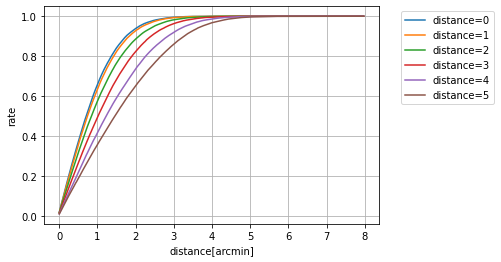

In [9]:
 for a in range(0,6):
    b=0
    counts_list=hist_list[a][b]
    area0=counts_list[int(numbin/2)]
    d_list=[]
    area_list=[]
    for i in range (int((numbin/2)-1)):
        d_list.append(i*(max-min)/numbin)
        count0_p = counts_list[int(numbin/2)+i+1]
        count0_m = counts_list[int(numbin/2)-i-1]
        area0=area0+count0_p+count0_m
        area_list.append(area0)
        rate_list= [x/50000 for x in area_list]
        #print(area0)

    print(area0)
    plt.plot(d_list, rate_list ,label="distance=%d" %a)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.grid(True)
    plt.xlabel("distance[arcmin]")
    plt.ylabel("rate")

In [5]:
plt.savefig('distance_corrected.png')

<Figure size 432x288 with 0 Axes>

In [6]:
print(d_list)

[0.0, 0.016, 0.032, 0.048, 0.064, 0.08, 0.096, 0.112, 0.128, 0.144, 0.16, 0.176, 0.192, 0.208, 0.224, 0.24, 0.256, 0.272, 0.288, 0.304, 0.32, 0.336, 0.352, 0.368, 0.384, 0.4, 0.416, 0.432, 0.448, 0.464, 0.48, 0.496, 0.512, 0.528, 0.544, 0.56, 0.576, 0.592, 0.608, 0.624, 0.64, 0.656, 0.672, 0.688, 0.704, 0.72, 0.736, 0.752, 0.768, 0.784, 0.8, 0.816, 0.832, 0.848, 0.864, 0.88, 0.896, 0.912, 0.928, 0.944, 0.96, 0.976, 0.992, 1.008, 1.024, 1.04, 1.056, 1.072, 1.088, 1.104, 1.12, 1.136, 1.152, 1.168, 1.184, 1.2, 1.216, 1.232, 1.248, 1.264, 1.28, 1.296, 1.312, 1.328, 1.344, 1.36, 1.376, 1.392, 1.408, 1.424, 1.44, 1.456, 1.472, 1.488, 1.504, 1.52, 1.536, 1.552, 1.568, 1.584, 1.6, 1.616, 1.632, 1.648, 1.664, 1.68, 1.696, 1.712, 1.728, 1.744, 1.76, 1.776, 1.792, 1.808, 1.824, 1.84, 1.856, 1.872, 1.888, 1.904, 1.92, 1.936, 1.952, 1.968, 1.984, 2.0, 2.016, 2.032, 2.048, 2.064, 2.08, 2.096, 2.112, 2.128, 2.144, 2.16, 2.176, 2.192, 2.208, 2.224, 2.24, 2.256, 2.272, 2.288, 2.304, 2.32, 2.336, 2.352,

mean_of_mean =  0.0018637117500388768
Standard deviation =  1.7687667977549313


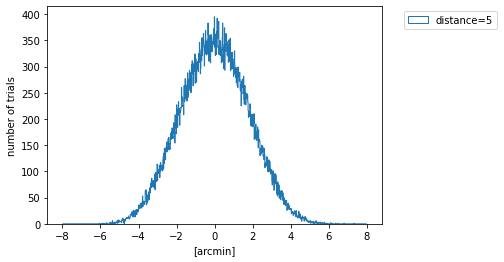

In [7]:
for i in range(10000):
    A = []
    for n in range(len(ni)):
        n1=int(N*ni[n])
        n2=N-n1
        a1=np.random.normal(
            loc   = -3/2,
            scale = FWHM/2.35,
            size  = n1,
            )
        #print("a1= ", a1)
        a2=np.random.normal(
            loc   = 3/2,
            scale = FWHM/2.35,
            size  = n2,
            )
        #print("a2 ", a2)
        A=np.append(a1,a2)
        #print(A)
        mean=np.mean(A)
        mean_list.append(mean)
        #print("n1 = ", n1)
        #print("n2 = ", n2)
        #print("mean = ", mean)
        #plt.hist(a1)
        #plt.hist(A,bins=50,histtype="step",label="gaus1:gaus2 = {:.1f} : {:.1f}".format(ni[n], 1-ni[n]))
        #plt.xlabel("[arcmin]")
        #plt.ylabel("number of trials")
        #plt.legend(bbox_to_anchor=(1.05,0.9))
    #print("mean_list =", mean_list)

res=plt.hist(mean_list, bins=numbin,histtype="step",range=(min,max),label="distance=%d" %d)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
hist_list.append(res)
mean_of_mean=np.mean(mean_list)
print("mean_of_mean = ", mean_of_mean)

plt.xlabel("[arcmin]")
plt.ylabel("number of trials")


#print("total mean_list =", mean_list)
st_d=np.std(mean_list)
sigma_list.append(st_d)
mean_plus_sigma=mean_of_mean+st_d
mean_sigma_list.append(mean_plus_sigma)
print("Standard deviation = ", st_d)

In [8]:
print(d_list)

[0.0, 0.016, 0.032, 0.048, 0.064, 0.08, 0.096, 0.112, 0.128, 0.144, 0.16, 0.176, 0.192, 0.208, 0.224, 0.24, 0.256, 0.272, 0.288, 0.304, 0.32, 0.336, 0.352, 0.368, 0.384, 0.4, 0.416, 0.432, 0.448, 0.464, 0.48, 0.496, 0.512, 0.528, 0.544, 0.56, 0.576, 0.592, 0.608, 0.624, 0.64, 0.656, 0.672, 0.688, 0.704, 0.72, 0.736, 0.752, 0.768, 0.784, 0.8, 0.816, 0.832, 0.848, 0.864, 0.88, 0.896, 0.912, 0.928, 0.944, 0.96, 0.976, 0.992, 1.008, 1.024, 1.04, 1.056, 1.072, 1.088, 1.104, 1.12, 1.136, 1.152, 1.168, 1.184, 1.2, 1.216, 1.232, 1.248, 1.264, 1.28, 1.296, 1.312, 1.328, 1.344, 1.36, 1.376, 1.392, 1.408, 1.424, 1.44, 1.456, 1.472, 1.488, 1.504, 1.52, 1.536, 1.552, 1.568, 1.584, 1.6, 1.616, 1.632, 1.648, 1.664, 1.68, 1.696, 1.712, 1.728, 1.744, 1.76, 1.776, 1.792, 1.808, 1.824, 1.84, 1.856, 1.872, 1.888, 1.904, 1.92, 1.936, 1.952, 1.968, 1.984, 2.0, 2.016, 2.032, 2.048, 2.064, 2.08, 2.096, 2.112, 2.128, 2.144, 2.16, 2.176, 2.192, 2.208, 2.224, 2.24, 2.256, 2.272, 2.288, 2.304, 2.32, 2.336, 2.352,